Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.Создайте датафреймы X и y из этих
 данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [73]:
from sklearn.datasets import load_boston
boston=load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [74]:
X=pd.DataFrame(boston.data,columns=boston.feature_names)
y=boston.target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [77]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,learning_rate=250,random_state=42)
X_train_tsne=tsne.fit_transform(X_train_scaled)

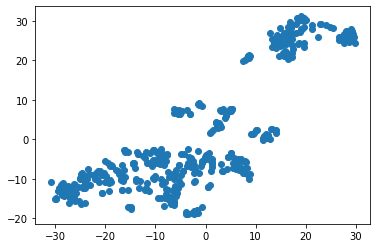

In [78]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1])
plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [79]:
from sklearn.cluster import KMeans

In [80]:
model = KMeans(n_clusters=3,max_iter=100, random_state=42)

In [81]:
train_labels=model.fit_predict(X_train_scaled)
print(train_labels)

[1 2 0 1 2 2 2 0 1 1 2 2 2 1 2 2 2 0 2 0 1 2 0 2 0 2 1 0 2 0 2 2 1 1 2 0 0
 2 2 0 0 2 1 2 1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2
 2 2 0 2 1 1 1 1 0 2 1 1 1 0 1 2 2 1 1 0 0 2 1 1 2 1 2 0 0 0 2 2 0 2 2 2 1
 0 2 0 0 1 1 1 2 2 2 1 1 2 0 1 1 0 0 1 0 2 2 2 2 1 2 0 2 1 2 1 2 2 2 1 2 2
 2 2 2 1 0 2 0 1 1 1 1 1 0 2 1 2 1 0 0 2 0 2 2 0 0 1 0 0 1 1 0 2 2 2 1 2 1
 1 0 0 1 1 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 0 2 2 2 2 0 2 1 2 1 0 1 2 1 1 1
 1 2 2 0 0 2 0 2 1 2 2 2 2 2 1 1 0 2 2 0 0 1 1 2 0 1 1 2 0 0 1 2 0 1 2 2 1
 2 1 2 2 0 2 2 2 2 2 2 0 1 2 1 2 2 0 2 1 1 0 1 2 1 2 2 1 0 0 2 1 0 1 1 1 2
 0 1 2 2 2 2 2 2 1 0 2 1 0 0 2 0 2 0 2 1 0 2 2 2 0 1 2 1 1 2 1 0 2 2 1 2 1
 1 2 2 1 0 2 2 0 2 2 2 1 2 2 2 2 1 2 1 2 0 0 1 0 1 2 1 0 2 1 0 2 0 2 0 2 0
 2 2 1 2 0 1 0 1 2 1 0 2 2 1 2 1 1 2 1 2 1 2 2 1 2 2 2 0 2 2 2 0 1 2]


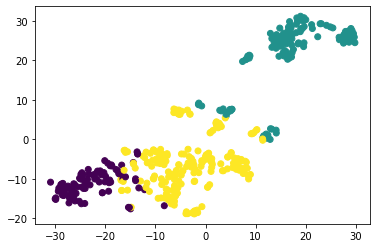

In [82]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=train_labels)
plt.show()

In [83]:
print('Средние значения price:')
print('0:', (y_train[train_labels==0].mean()))
print('0:', (y_train[train_labels==1].mean()))
print('0:', (y_train[train_labels==2].mean()))
print('Средние значения CRIM:')
print('0:', (X_train.loc[train_labels==0,'CRIM'].mean()))
print('0:', (X_train.loc[train_labels==1,'CRIM'].mean()))
print('0:', (X_train.loc[train_labels==2,'CRIM'].mean()))

Средние значения price:
0: 27.78837209302326
0: 16.165354330708663
0: 24.958115183246072
Средние значения CRIM:
0: 0.07356558139534886
0: 10.797028425196853
0: 0.42166020942408367


*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [87]:
test_labels=model.predict(X_test_scaled)
print(test_labels)

[2 0 1 2 1 2 2 1 1 2 2 2 1 2 2 1 2 1 0 1 2 0 2 2 1 1 2 1 2 2 2 2 1 1 1 1 2
 2 2 2 2 2 0 2 2 1 2 2 1 2 2 0 2 2 0 1 1 0 2 2 2 0 2 2 0 2 1 2 0 1 2 1 1 0
 2 1 2 0 1 1 2 1 0 1 2 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 2 2]


In [88]:
print('Средние значения price:')
print('0:', (y_test[test_labels==0].mean()))
print('1:', (y_test[test_labels==1].mean()))
print('2:', (y_test[test_labels==2].mean()))
print('Средние значения CRIM:')
print('0:', (X_test.loc[test_labels==0,'CRIM'].mean()))
print('1:', (X_test.loc[test_labels==1,'CRIM'].mean()))
print('2:', (X_test.loc[test_labels==2,'CRIM'].mean()))

Средние значения price:
0: 34.55384615384616
1: 16.710526315789473
2: 21.71764705882353
Средние значения CRIM:
0: 0.08308461538461537
1: 9.419181842105264
2: 0.22250117647058823
